In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df=pd.read_csv('AQI.csv')
df.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20096\1674834259.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('AQI.csv')


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,02-01-1990
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,02-01-1990
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,02-01-1990
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,03-01-1990
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,03-01-1990


In [3]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [4]:
df.dtypes

stn_code                        object
sampling_date                   object
state                           object
location                        object
agency                          object
type                            object
so2                            float64
no2                            float64
rspm                           float64
spm                            float64
location_monitoring_station     object
pm2_5                          float64
date                            object
dtype: object

In [5]:
cat_col=df.select_dtypes(include=['object']).astype(str)
cat_col.head(5)

# categorical_cols = ['stn_code','state', 'location', 'agency', 'type', 'location_monitoring_station']
for col in cat_col:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20096\2601226722.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [6]:
num_cols=['so2', 'no2', 'rspm', 'spm', 'pm2_5']
for col in num_cols:
    df[col].fillna(df[col].mean(),inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20096\1806635165.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)


In [7]:
df

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",4.800000,17.400000,108.832784,220.78348,Regional Office,40.791467,02-01-1990
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,Maharashtra State Pollution Control Board,Industrial Area,3.100000,7.000000,108.832784,220.78348,Regional Office,40.791467,02-01-1990
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",6.200000,28.500000,108.832784,220.78348,Regional Office,40.791467,02-01-1990
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",6.300000,14.700000,108.832784,220.78348,Regional Office,40.791467,03-01-1990
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,Maharashtra State Pollution Control Board,Industrial Area,4.700000,7.500000,108.832784,220.78348,Regional Office,40.791467,03-01-1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.000000,50.000000,143.000000,220.78348,"Inside Rampal Industries,ULUBERIA",40.791467,12/24/2015
435738,SAMP,29-12-2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.000000,46.000000,171.000000,220.78348,"Inside Rampal Industries,ULUBERIA",40.791467,12/29/2015
435739,193.0,19-03-2015,andaman-and-nicobar-islands,Guwahati,Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",10.829414,25.809623,108.832784,220.78348,Regional Office,40.791467,3/19/2015
435740,193.0,19-03-2015,Lakshadweep,Guwahati,Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",10.829414,25.809623,108.832784,220.78348,Regional Office,40.791467,3/19/2015


In [8]:
df.isnull().sum()

stn_code                       0
sampling_date                  0
state                          0
location                       0
agency                         0
type                           0
so2                            0
no2                            0
rspm                           0
spm                            0
location_monitoring_station    0
pm2_5                          0
date                           0
dtype: int64

In [9]:
df.duplicated().sum()

674

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.drop(columns='sampling_date',axis=1,inplace=True)

In [13]:
df.isnull().sum()

stn_code                       0
state                          0
location                       0
agency                         0
type                           0
so2                            0
no2                            0
rspm                           0
spm                            0
location_monitoring_station    0
pm2_5                          0
date                           0
dtype: int64

In [14]:
df['date']=df['date'].str.replace('/','-')
df['date'] = pd.to_datetime(df['date'])

In [15]:
df.dtypes

stn_code                               object
state                                  object
location                               object
agency                                 object
type                                   object
so2                                   float64
no2                                   float64
rspm                                  float64
spm                                   float64
location_monitoring_station            object
pm2_5                                 float64
date                           datetime64[ns]
dtype: object

In [16]:
df

,stn_code,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,Andhra Pradesh,Hyderabad,Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",4.800000,17.400000,108.832784,220.78348,Regional Office,40.791467,1990-02-01
1,151.0,Andhra Pradesh,Hyderabad,Maharashtra State Pollution Control Board,Industrial Area,3.100000,7.000000,108.832784,220.78348,Regional Office,40.791467,1990-02-01
2,152.0,Andhra Pradesh,Hyderabad,Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",6.200000,28.500000,108.832784,220.78348,Regional Office,40.791467,1990-02-01
3,150.0,Andhra Pradesh,Hyderabad,Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",6.300000,14.700000,108.832784,220.78348,Regional Office,40.791467,1990-03-01
4,151.0,Andhra Pradesh,Hyderabad,Maharashtra State Pollution Control Board,Industrial Area,4.700000,7.500000,108.832784,220.78348,Regional Office,40.791467,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.000000,50.000000,143.000000,220.78348,"Inside Rampal Industries,ULUBERIA",40.791467,2015-12-24
435738,SAMP,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.000000,46.000000,171.000000,220.78348,"Inside Rampal Industries,ULUBERIA",40.791467,2015-12-29
435739,193.0,andaman-and-nicobar-islands,Guwahati,Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",10.829414,25.809623,108.832784,220.78348,Regional Office,40.791467,2015-03-19
435740,193.0,Lakshadweep,Guwahati,Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",10.829414,25.809623,108.832784,220.78348,Regional Office,40.791467,2015-03-19


In [17]:
df['year']=df['date'].dt.year
df.sort_values(by='date',inplace=True)

In [18]:
df.columns

Index(['stn_code', 'state', 'location', 'agency', 'type', 'so2', 'no2', 'rspm',
       'spm', 'location_monitoring_station', 'pm2_5', 'date', 'year'],
      dtype='object')

In [19]:
pd.set_option('display.max_columns',None)

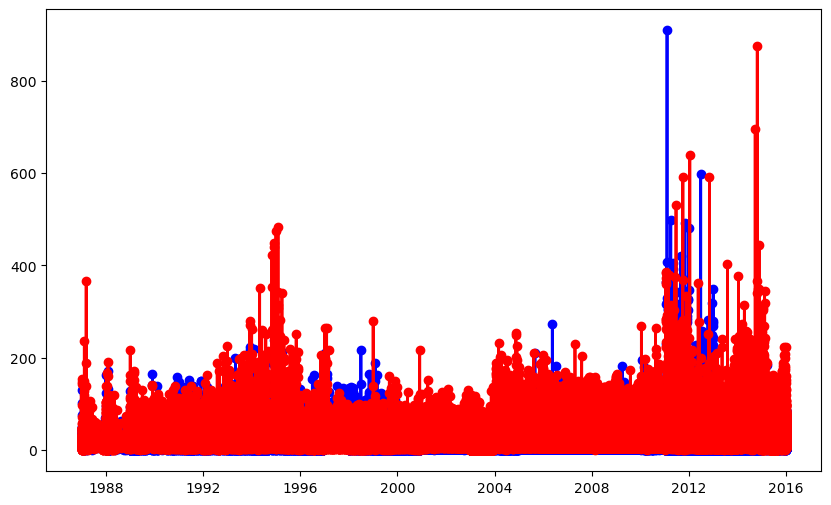

In [20]:
plt.figure(figsize=(10,6))
plt.plot(df['date'],df['so2'],marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.plot(df['date'], df['no2'], marker='o', color='r', linestyle='-', linewidth=2, markersize=6)

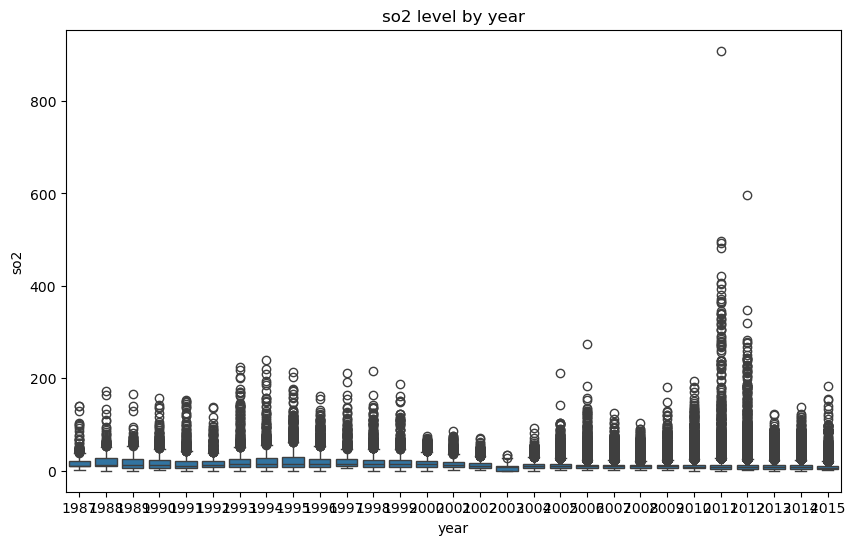

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x='year',y='so2',data=df)
plt.title('so2 level by year')
plt.xlabel('year')
plt.ylabel('so2')
plt.show()

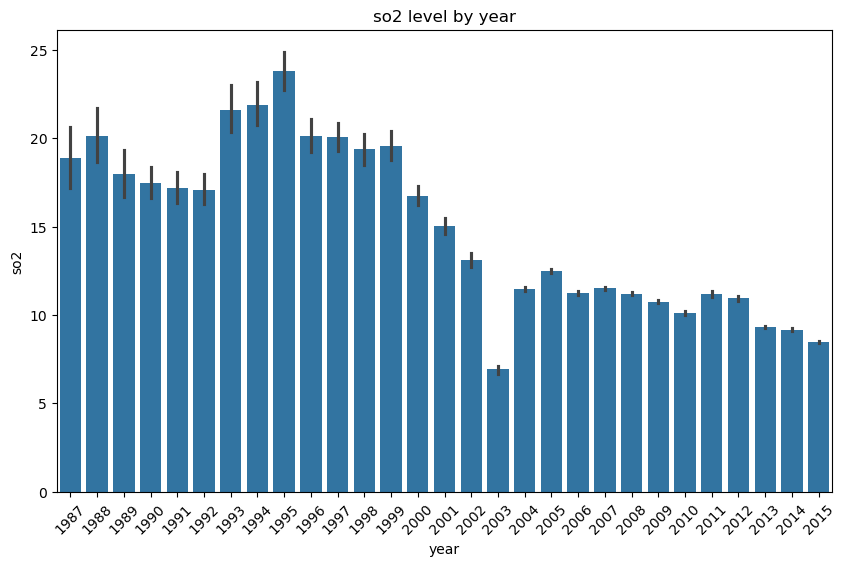

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x='year',y='so2',data=df)
plt.title('so2 level by year')
plt.xlabel('year')
plt.ylabel('so2')
plt.xticks(rotation=45)
plt.show()

In [23]:
def category_pm2_5(pm25):
    if pm25 <= 35:
        return 'Low'
    elif pm25 <= 75:
        return 'Medium'
    else:
        return 'High'

df['pollution_category']=df['pm2_5'].apply(category_pm2_5)

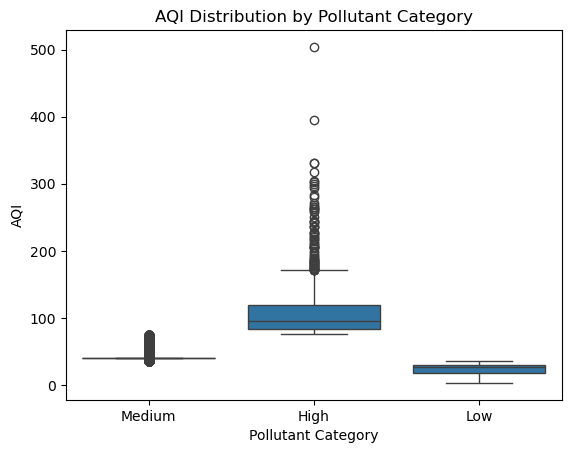

In [24]:
plt.figure(figure=(12,12))
sns.boxplot(x='pollution_category',y='pm2_5', data=df)
plt.title('AQI Distribution by Pollutant Category')
plt.xlabel('Pollutant Category')
plt.ylabel('AQI')
plt.show()

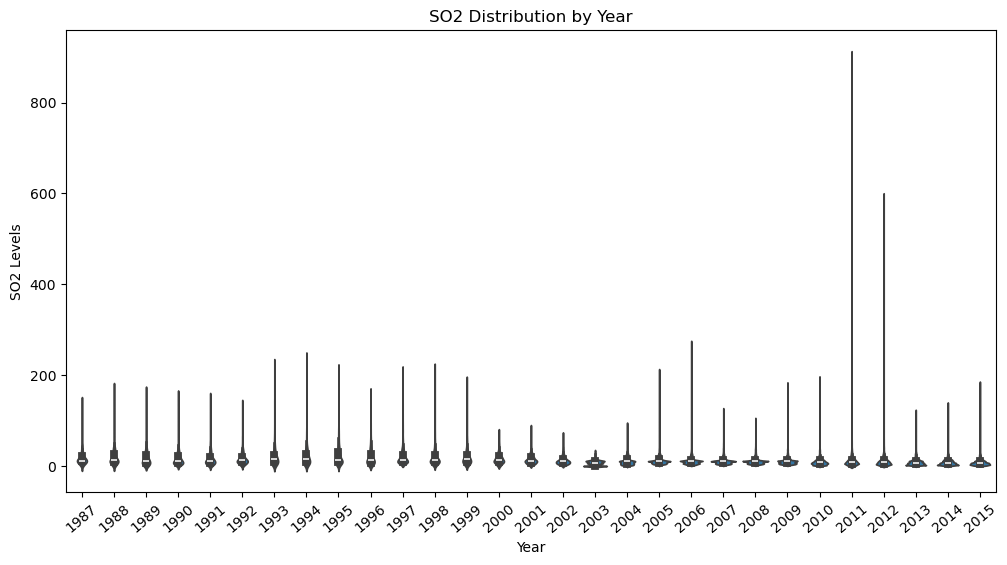

In [25]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='year', y='so2', data=df)
plt.title('SO2 Distribution by Year')
plt.xlabel('Year')
plt.ylabel('SO2 Levels')
plt.xticks(rotation=40)
plt.show()

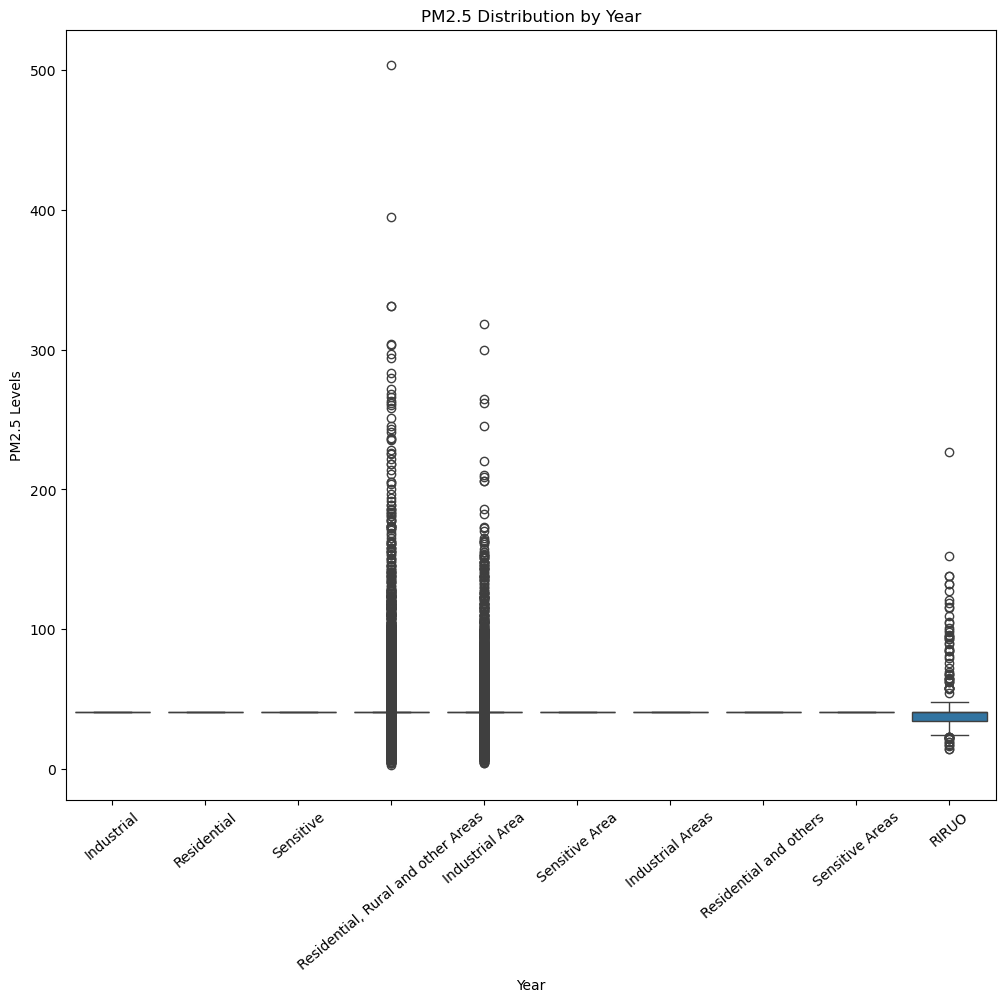

In [26]:
plt.figure(figsize=(12, 10))
sns.boxplot(x='type', y='pm2_5', data=df)
plt.title('PM2.5 Distribution by Year')
plt.xlabel('Year')
plt.ylabel('PM2.5 Levels')
plt.xticks(rotation=40)
plt.show()

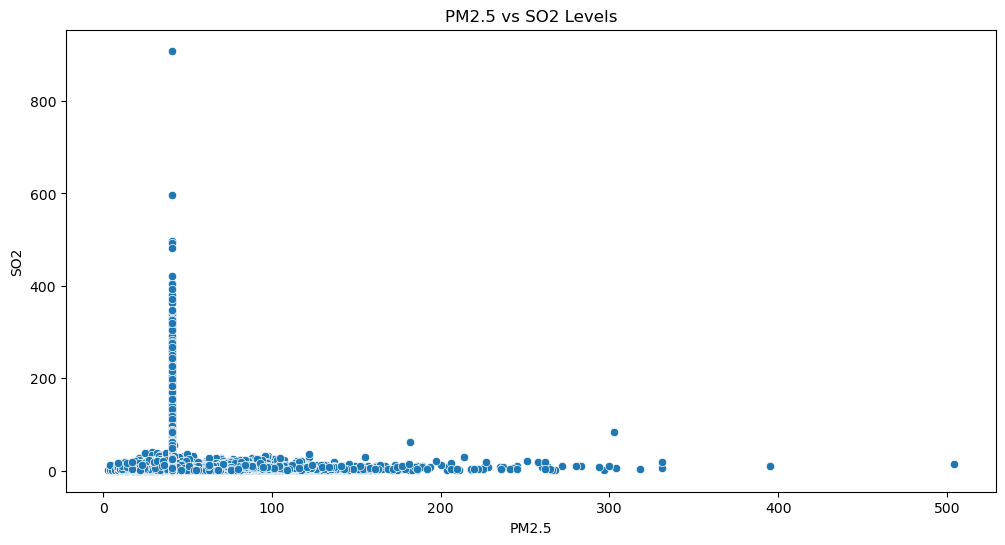

In [27]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='pm2_5', y='so2', data=df)
plt.title('PM2.5 vs SO2 Levels')
plt.xlabel('PM2.5')
plt.ylabel('SO2')
plt.show()